## AIVLE School [AI 미니프로젝트] '서울시 생활정보 기반 대중교통 수요 분석'<br>

---

# 2. 구 별 이동인구 분석
### 서울시 생활이동 정보를 기반으로 서울시 자치구 별 이동인구를 분석합니다

In [1]:
# 필요 라이브러리를 설치합니다.
%pip install pandas seaborn

Note: you may need to restart the kernel to use updated packages.


## 데이터 안내

[데이터 파일명]
* 2. seoul_moving.csv

[데이터 정보]
* 서울 시 구별 이동 2022년 4월 데이터

[데이터 컬럼 정보]
* 도착시간 : 0 -> "0:00~0:59"를 의미 
* 출발 자치구 : 자치구 코드
* 성별 : F(여성), M(남성)
* 나이 : 10 ~ 79세 (5세 단위), 0 ~ 10세, 80세 이상으로 구분
* 유형 : H(야간상주지), W(주간상주지), E(기타)
* 평균 이동 시간 : 동일 열 내 이동인구의 월 단위 평균 이동 시간 (10분단위)
* 이동인구 : 추정 합산값으로 소수점 표출, 개인정보 비식별화를 위해 3명 미만(0~3)의 경우 * 처리

---

# 2.1.데이터 불러오기

#### [2.1.1] 데이터 로딩
* Pandas 라이브러리를 활용해서 '2. seoul_moving.csv'파일을 'seoul_moving' 변수에 저장하세요.
    * 데이터 파일 로딩시 참고 사항 
        * 구분자(sep)는 ',' 입니다
        * UTF-8 인코더를 사용해 주세요
        * index column은 0번 열 입니다
    * 데이터를 불러올 때 오류가 발생한다면, 오류에 대해 직접 검색하여 해결해보세요.

In [2]:
# 아래에 코드를 작성하고 결과를 확인합니다.
import pandas as pd

In [3]:
seoul_moving = pd.read_csv('seoul_moving.csv')

In [4]:
# 데이터 프레임의 Shape을 확인합니다.
seoul_moving.shape

(28923054, 11)

---

# 2.2.기본 정보 확인 및 클렌징

+ 데이터 클렌징 : 결측치, 이상치 등을 제거하여 데이터 분석 결과가 왜곡 되는 문제를 방지하기 위한 정제 과정

#### [2.2.1] 기본 정보 확인하기
* 'seoul_moving' 데이터의 정보를 확인해보세요.
* 'describe', 'info', 'head', 'tail' 등 전부 활용해 보세요.

In [5]:
# 아래에 코드를 작성하고 결과를 확인합니다.
seoul_moving.describe()

,Unnamed: 0,대상연월,도착시간,출발 시군구 코드,도착 시군구 코드,나이,평균 이동 시간(분)
count,2.892305e+07,28923054.0,2.892305e+07,2.892305e+07,2.892305e+07,2.892305e+07,2.892305e+07
mean,7.141390e+05,202204.0,1.365597e+01,1.712362e+04,1.719750e+04,4.279614e+01,3.279829e+01
std,4.753792e+05,0.0,5.849675e+00,9.046478e+03,9.063818e+03,1.777485e+01,2.584213e+01
min,0.000000e+00,202204.0,0.000000e+00,1.101000e+04,1.101000e+04,0.000000e+00,1.000000e+01
25%,3.012810e+05,202204.0,1.000000e+01,1.110000e+04,1.111000e+04,3.000000e+01,2.000000e+01
50%,6.556670e+05,202204.0,1.400000e+01,1.120000e+04,1.120000e+04,4.500000e+01,3.000000e+01
75%,1.082991e+06,202204.0,1.800000e+01,3.101400e+04,3.102100e+04,5.500000e+01,4.000000e+01
max,1.871922e+06,202204.0,2.300000e+01,3.900000e+04,3.900000e+04,8.000000e+01,7.700000e+02


In [6]:
# 아래에 코드를 작성하고 결과를 확인합니다.
seoul_moving.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28923054 entries, 0 to 28923053
Data columns (total 11 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   Unnamed: 0   int64 
 1   대상연월         int64 
 2   요일           object
 3   도착시간         int64 
 4   출발 시군구 코드    int64 
 5   도착 시군구 코드    int64 
 6   성별           object
 7   나이           int64 
 8   이동유형         object
 9   평균 이동 시간(분)  int64 
 10  이동인구(합)      object
dtypes: int64(7), object(4)
memory usage: 2.4+ GB


In [7]:
seoul_moving.rename(columns={'Unnamed: 0': 'ID'}, inplace=True)

In [8]:
# 아래에 코드를 작성하고 결과를 확인합니다.
seoul_moving.head()

,ID,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
0,0,202204,일,0,11010,11010,F,0,EE,10,28.02
1,1,202204,일,0,11010,11010,F,0,EH,10,27.52
2,2,202204,일,0,11010,11010,F,0,HE,10,27.83
3,3,202204,일,0,11010,11010,F,10,HW,10,6.05
4,4,202204,일,0,11010,11010,F,10,EH,90,5.95


In [9]:
# 아래에 코드를 작성하고 결과를 확인합니다.
seoul_moving.tail()

,ID,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
28923049,968458,202204,토,23,39000,11250,M,45,EH,50,3.16
28923050,968459,202204,토,23,39000,11250,M,50,EH,70,3.27
28923051,968460,202204,토,23,39000,11250,M,55,EE,50,3.31
28923052,968461,202204,토,23,39000,11250,M,55,EH,50,3.28
28923053,968462,202204,토,23,39000,11250,M,75,EH,30,5.94


* [참고] 1번 열의 의미
    * " 2022년 4월 일요일에 11010(종로구)에서 11010(종로구)으로 이동하여 0시 ~ 0시 59분 사이에 도착했고, E(기타)에서 H(야간상주지(집))으로 이동한 0 ~ 10세 여성은 총 27.52명이며 이들의 평균 이동시간은 10분이다

#### [2.2.2] 결측치 처리 (NaN이 아닌 결측치 처리)

* '이동인구(합)' column은 이동 인구의 합산인데 숫자가 아닌 object 타입입니다. 

    - 왜 일까요? 

    - Tip! (이동인구 : 추정 합산값으로 소수점 표출, 개인정보 비식별화를 위해 3명 미만 즉, 값이 0~3일 경우 별표 * 처리)

    - 해당 값을 어떻게 처리하는 것이 좋을 지 생각해보아서 각자의 방법으로 변경하세요

    - '인구이동(합)' 컬럼의 데이터 타입을 수치형으로 변경하세요 

In [10]:
# 이동인구(합) 컬럼의 값 별로 개수를 세어봅니다.
seoul_moving['이동인구(합)'].nunique()

135812

In [11]:
# 별표(*)로 표현된 값을 대체합니다.
# 해당 값을 어떻게 처리하는 것이 좋을 지 생각해보아서 각자의 방법으로 변경하세요
#(ex: 최빈값, 평균값도 알 수 없으므로 0~3의 중위값인 1.5로 대체)
seoul_moving.loc[seoul_moving['이동인구(합)'] == "*", '이동인구(합)'] = 1.5

In [12]:
# 이동인구(합) 컬럼의 값 별로 개수를 다시 세어봅니다.
seoul_moving['이동인구(합)'].value_counts()

이동인구(합)
1.5        3842041
3.3         399374
6.05        366830
3.29        289731
3.31        232069
            ...   
2352.37          1
1617.99          1
3141.86          1
1485.54          1
979.87           1
Name: count, Length: 135812, dtype: int64

In [13]:
# 이제 이동인구(합) column의 데이터 타입을 바꿔주세요
seoul_moving['이동인구(합)'] = seoul_moving['이동인구(합)'].astype('float')

In [14]:
seoul_moving.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28923054 entries, 0 to 28923053
Data columns (total 11 columns):
 #   Column       Dtype  
---  ------       -----  
 0   ID           int64  
 1   대상연월         int64  
 2   요일           object 
 3   도착시간         int64  
 4   출발 시군구 코드    int64  
 5   도착 시군구 코드    int64  
 6   성별           object 
 7   나이           int64  
 8   이동유형         object 
 9   평균 이동 시간(분)  int64  
 10  이동인구(합)      float64
dtypes: float64(1), int64(7), object(3)
memory usage: 2.4+ GB


#### [2.2.3] 이동유형, 요일, 성별 변수의 value수 파악

In [15]:
# 이동유형 컬럼의 값 별로 개수를 세어봅니다.
# H(야간상주지), W(주간상주지), E(기타)
seoul_moving.groupby('이동유형')[['이동유형']].count().T

이동유형,EE,EH,EW,HE,HH,HW,WE,WH,WW
이동유형,5085099,5757073,2304535,5520005,617845,2695189,2809148,3108026,1026134


In [16]:
# 요일 컬럼의 값 별로 개수를 세어봅니다.
seoul_moving.groupby('요일')[['요일']].count().T

요일,금,목,수,월,일,토,화
요일,4641881,4011291,3955646,3906272,3790282,4690806,3926876


* [참고] 2022년 4월의 요일 수는 다음과 같습니다.
    * 일 : 4, 월 : 4, 화 : 4, 수 : 4, 목 : 4, 금 : 5, 토 : 5

In [17]:
# 성별 컬럼의 값 별로 개수를 세어봅니다.
seoul_moving.groupby('성별')[['성별']].count().T

성별,F,M
성별,12568025,16355029


#### [2.2.4] 심야 이동이 가장 많은 요일 확인

In [18]:
seoul_moving['도착시간'].head()

0    0
1    0
2    0
3    0
4    0
Name: 도착시간, dtype: int64

In [19]:
seoul_moving

,ID,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
0,0,202204,일,0,11010,11010,F,0,EE,10,28.02
1,1,202204,일,0,11010,11010,F,0,EH,10,27.52
2,2,202204,일,0,11010,11010,F,0,HE,10,27.83
3,3,202204,일,0,11010,11010,F,10,HW,10,6.05
4,4,202204,일,0,11010,11010,F,10,EH,90,5.95
...,...,...,...,...,...,...,...,...,...,...,...
28923049,968458,202204,토,23,39000,11250,M,45,EH,50,3.16
28923050,968459,202204,토,23,39000,11250,M,50,EH,70,3.27
28923051,968460,202204,토,23,39000,11250,M,55,EE,50,3.31
28923052,968461,202204,토,23,39000,11250,M,55,EH,50,3.28


In [20]:
# 아래에 코드를 작성하고 결과를 확인합니다.
# 심야시간은 0:00~ 4:59
seoul_moving.loc[seoul_moving['도착시간'] <= 5].groupby('요일', as_index=False)[['도착시간']].count().sort_values('도착시간')

,요일,도착시간
3,월,338716
6,화,359741
2,수,371376
1,목,377407
4,일,383611
0,금,435296
5,토,501891


#### [2.2.5] 서울 지역의 데이터만 추출

* 서울시의 데이터만 필요하므로 출발과 도착이 모두 서울인 데이터만 추출하세요.
* 아래 사이트에서 서울시 데이터만 추출하기 위해 필요한 정보를 탐색해보세요. (ex. 자치구 코드 정보)
https://data.seoul.go.kr/dataVisual/seoul/seoulLivingMigration.do

In [21]:
%pip install openpyxl

In [22]:
# 출발 시군구 코드, 도착 시군구 코드 활용하여 출발과 도착이 모두 서울인 데이터만 추출해보세요.
자치구코드 = pd.read_excel('./서울생활이동데이터_자치구코드_20210907.xlsx')
자치구코드.head(30).T

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
시도,11000,11000,11000,11000,11000,11000,11000,11000,11000,11000,...,11000,11000,11000,11000,11000,21000,22000,23000,23000,23000
시군구,11010,11020,11030,11040,11050,11060,11070,11080,11090,11100,...,11210,11220,11230,11240,11250,21000,22000,23010,23020,23030
name,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,도봉구,...,관악구,서초구,강남구,송파구,강동구,부산광역시,대구광역시,중구,동구,남구
full name,서울특별시 종로구,서울특별시 중구,서울특별시 용산구,서울특별시 성동구,서울특별시 광진구,서울특별시 동대문구,서울특별시 중랑구,서울특별시 성북구,서울특별시 강북구,서울특별시 도봉구,...,서울특별시 관악구,서울특별시 서초구,서울특별시 강남구,서울특별시 송파구,서울특별시 강동구,부산광역시,대구광역시,인천광역시 중구,인천광역시 동구,인천광역시 남구


In [23]:
서울자치구코드 = 자치구코드[['시군구', 'name']][:25]

In [24]:
서울자치구코드.T

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
시군구,11010,11020,11030,11040,11050,11060,11070,11080,11090,11100,...,11160,11170,11180,11190,11200,11210,11220,11230,11240,11250
name,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,도봉구,...,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구


In [25]:
seoul_moving = seoul_moving.merge(서울자치구코드, left_on='출발 시군구 코드', right_on='시군구', how='inner')
seoul_moving.drop(['시군구'], axis=1, inplace=True)
seoul_moving.rename(columns={'name': '출발 시군구'}, inplace=True)

In [26]:
seoul_moving.head()

,ID,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합),출발 시군구
0,0,202204,일,0,11010,11010,F,0,EE,10,28.02,종로구
1,1,202204,일,0,11010,11010,F,0,EH,10,27.52,종로구
2,2,202204,일,0,11010,11010,F,0,HE,10,27.83,종로구
3,3,202204,일,0,11010,11010,F,10,HW,10,6.05,종로구
4,4,202204,일,0,11010,11010,F,10,EH,90,5.95,종로구


In [27]:
seoul_moving = seoul_moving.merge(서울자치구코드, left_on='도착 시군구 코드', right_on='시군구', how='inner')
seoul_moving.drop(['시군구'], axis=1, inplace=True)
seoul_moving.rename(columns={'name': '도착 시군구'}, inplace=True)
seoul_moving.head()

,ID,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합),출발 시군구,도착 시군구
0,0,202204,일,0,11010,11010,F,0,EE,10,28.02,종로구,종로구
1,1,202204,일,0,11010,11010,F,0,EH,10,27.52,종로구,종로구
2,2,202204,일,0,11010,11010,F,0,HE,10,27.83,종로구,종로구
3,3,202204,일,0,11010,11010,F,10,HW,10,6.05,종로구,종로구
4,4,202204,일,0,11010,11010,F,10,EH,90,5.95,종로구,종로구


#### [2.2.6] 서울지역의 구 별로 groupby하여 데이터를 확인해보세요. (유동인구 기준)

* 유출이 제일 많은 구는?

* 유입이 제일 많은 구는?

* 유출이 제일 적은 구는?

* 유입이 제일 적은 구는?

* [참고] 서울 구별 코드
    * 11010	종로구
    * 11020	중구
    * 11030	용산구
    * 11040	성동구
    * 11050	광진구
    * 11060	동대문구
    * 11070	중랑구
    * 11080	성북구
    * 11090	강북구
    * 11100	도봉구
    * 11110	노원구
    * 11120	은평구
    * 11130	서대문구
    * 11140	마포구
    * 11150	양천구
    * 11160	강서구
    * 11170	구로구
    * 11180	금천구
    * 11190	영등포구
    * 11200	동작구
    * 11210	관악구
    * 11220	서초구
    * 11230	강남구
    * 11240	송파구
    * 11250	강동구

In [28]:
temp = seoul_moving.loc[seoul_moving['출발 시군구'] != seoul_moving['도착 시군구']]
temp

,ID,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합),출발 시군구,도착 시군구
41499,4238,202204,일,0,11020,11010,F,10,EH,30,5.87,중구,종로구
41500,4239,202204,일,0,11020,11010,F,15,EE,20,12.23,중구,종로구
41501,4240,202204,일,0,11020,11010,F,15,WE,10,4.09,중구,종로구
41502,4241,202204,일,0,11020,11010,F,15,WH,20,4.06,중구,종로구
41503,4242,202204,일,0,11020,11010,F,20,WW,10,12.10,중구,종로구
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10608886,915031,202204,토,23,11240,11250,M,70,WE,10,4.65,송파구,강동구
10608887,915032,202204,토,23,11240,11250,M,75,EH,30,17.76,송파구,강동구
10608888,915033,202204,토,23,11240,11250,M,75,EE,60,11.92,송파구,강동구
10608889,915034,202204,토,23,11240,11250,M,75,WH,10,23.72,송파구,강동구


In [29]:
export_moving = temp.groupby('출발 시군구', as_index=False)[['이동인구(합)']].sum().rename(columns={'이동인구(합)': '유출인구', '출발 시군구': '시군구'})
export_moving.head()

,시군구,유출인구
0,강남구,21575290.87
1,강동구,7032537.23
2,강북구,6531790.60
3,강서구,8207681.45
4,관악구,9238658.13


In [30]:
temp.groupby('출발 시군구')[['이동인구(합)']].sum().sort_values(ascending=False, by="이동인구(합)").iloc[0]

이동인구(합)    21575290.87
Name: 강남구, dtype: float64

In [31]:
import_moving = temp.groupby('도착 시군구', as_index=False)[['이동인구(합)']].sum().rename(columns={'이동인구(합)': '유입인구', '도착 시군구':'시군구'})
import_moving.head()

,시군구,유입인구
0,강남구,21506979.64
1,강동구,6993710.01
2,강북구,6526754.03
3,강서구,8452096.73
4,관악구,9232253.88


In [32]:
# 아래에 코드를 작성하고 결과를 확인합니다.
temp.groupby('도착 시군구')[['이동인구(합)']].sum().sort_values(ascending=False, by="이동인구(합)").iloc[0]

이동인구(합)    21506979.64
Name: 강남구, dtype: float64

In [33]:
# 아래에 코드를 작성하고 결과를 확인합니다.
temp.groupby('출발 시군구')[['이동인구(합)']].sum().sort_values(ascending=True, by="이동인구(합)").iloc[0]

이동인구(합)    4158467.03
Name: 금천구, dtype: float64

In [34]:
temp.groupby('도착 시군구')[['이동인구(합)']].sum().sort_values(ascending=True, by="이동인구(합)").iloc[0]

이동인구(합)    4143689.02
Name: 금천구, dtype: float64

#### [2.2.7] 낮시간만 분석 대상에 넣기 위해 심야버스 제외

* 도착시간 0부터 4까지(0:00 ~ 4:59) 제거

In [35]:
# 아래에 코드를 작성하고 결과를 확인합니다.
seoul_moving = seoul_moving.loc[seoul_moving['도착시간'] >= 5]

In [36]:
seoul_moving

,ID,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합),출발 시군구,도착 시군구
6613,0,202204,일,5,11010,11010,F,10,HE,10,5.96,종로구,종로구
6614,1,202204,일,5,11010,11010,F,10,WH,10,5.88,종로구,종로구
6615,2,202204,일,5,11010,11010,F,15,HE,10,4.06,종로구,종로구
6616,3,202204,일,5,11010,11010,F,15,EW,10,4.06,종로구,종로구
6617,4,202204,일,5,11010,11010,F,15,EH,10,10.08,종로구,종로구
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10655890,920410,202204,토,23,11250,11250,M,80,WH,10,85.10,강동구,강동구
10655891,920411,202204,토,23,11250,11250,M,80,EH,10,28.36,강동구,강동구
10655892,920412,202204,토,23,11250,11250,M,80,EE,20,37.99,강동구,강동구
10655893,920413,202204,토,23,11250,11250,M,80,HE,10,9.42,강동구,강동구


#### [2.2.8] '도착 시군구 코드' 를 기준으로 각 구별로 '평균 이동 시간(분)' , '이동인구(합)' 의 평균과 합 도출

* groupby 사용, as_index=False로 설정해주세요

In [37]:
seoul_moving

,ID,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합),출발 시군구,도착 시군구
6613,0,202204,일,5,11010,11010,F,10,HE,10,5.96,종로구,종로구
6614,1,202204,일,5,11010,11010,F,10,WH,10,5.88,종로구,종로구
6615,2,202204,일,5,11010,11010,F,15,HE,10,4.06,종로구,종로구
6616,3,202204,일,5,11010,11010,F,15,EW,10,4.06,종로구,종로구
6617,4,202204,일,5,11010,11010,F,15,EH,10,10.08,종로구,종로구
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10655890,920410,202204,토,23,11250,11250,M,80,WH,10,85.10,강동구,강동구
10655891,920411,202204,토,23,11250,11250,M,80,EH,10,28.36,강동구,강동구
10655892,920412,202204,토,23,11250,11250,M,80,EE,20,37.99,강동구,강동구
10655893,920413,202204,토,23,11250,11250,M,80,HE,10,9.42,강동구,강동구


In [38]:
# '도착 시군구 코드' 를 기준으로 각 구별로 '평균 이동 시간(분)', '이동인구(합)'의 평균을 도출하여 seoul_moving_mean에 저장
seoul_moving_mean = seoul_moving.groupby('도착 시군구', as_index=False)[['평균 이동 시간(분)', '이동인구(합)']].mean()
seoul_moving_mean.columns=["시군구", "이동시간 평균", '이동인구 평균']
seoul_moving_mean.head()

,시군구,이동시간 평균,이동인구 평균
0,강남구,23.094565,90.226636
1,강동구,25.670084,64.249687
2,강북구,23.811274,39.128470
3,강서구,25.124068,58.447282
4,관악구,23.377928,49.904036


In [39]:
seoul_moving.groupby('도착 시군구')['평균 이동 시간(분)'].mean()

도착 시군구
강남구     23.094565
강동구     25.670084
강북구     23.811274
강서구     25.124068
관악구     23.377928
광진구     22.474283
구로구     22.933748
금천구     23.998944
노원구     24.029515
도봉구     24.489976
동대문구    21.673451
동작구     21.867593
마포구     22.044201
서대문구    22.026816
서초구     22.831643
성동구     21.740324
성북구     22.160283
송파구     25.429707
양천구     22.793734
영등포구    21.615227
용산구     21.364786
은평구     24.611578
종로구     21.349599
중구      21.012462
중랑구     23.412789
Name: 평균 이동 시간(분), dtype: float64

In [40]:
# '도착 시군구 코드' 를 기준으로 각 구별로 '평균 이동 시간(분)', '이동인구(합)'의 합을 도출하여 seoul_moving_sum에 저장
seoul_moving_sum = seoul_moving.groupby('도착 시군구', as_index=False)[['평균 이동 시간(분)', '이동인구(합)']].sum()
seoul_moving_sum.columns = ['시군구','이동시간 합', '이동인구 합']
seoul_moving_sum.head()

,시군구,이동시간 합,이동인구 합
0,강남구,11437560,44684651.43
1,강동구,8430800,21101460.33
2,강북구,7649610,12570412.30
3,강서구,9388010,21839762.06
4,관악구,8772170,18725641.04


In [41]:
# seoul_moving_mean, seoul_moving_sum을 합쳐보세요.
df_seoul_moving = pd.merge(seoul_moving_mean, seoul_moving_sum, how='inner', on='시군구')
df_seoul_moving = pd.merge(df_seoul_moving, import_moving, on='시군구')
df_seoul_moving = pd.merge(df_seoul_moving, export_moving, on='시군구')
df_seoul_moving.head()

,시군구,이동시간 평균,이동인구 평균,이동시간 합,이동인구 합,유입인구,유출인구
0,강남구,23.094565,90.226636,11437560,44684651.43,21506979.64,21575290.87
1,강동구,25.670084,64.249687,8430800,21101460.33,6993710.01,7032537.23
2,강북구,23.811274,39.128470,7649610,12570412.30,6526754.03,6531790.60
3,강서구,25.124068,58.447282,9388010,21839762.06,8452096.73,8207681.45
4,관악구,23.377928,49.904036,8772170,18725641.04,9232253.88,9238658.13


In [42]:
# 필요에 따라 column명을 데이터 의미에 맞게 적절히 변경하세요.
df_seoul_moving.rename(columns={'시군구':'자치구'}, inplace=True)
df_seoul_moving.columns

Index(['자치구', '이동시간 평균', '이동인구 평균', '이동시간 합', '이동인구 합', '유입인구', '유출인구'], dtype='object')

In [43]:
df_seoul_moving.set_index('자치구', inplace=True)

In [44]:
# 해당 데이터프레임을 'df_seoul_moving.csv' 파일로 저장하세요
df_seoul_moving.to_csv('df_seoul_moving.csv')

---

# 2.3.데이터 분석하기
+ 데이터의 형태를 살펴보고 다양한 분석기법을 통해 모델링에 적합하도록 정제요소를 선별하세요.
  * 데이터들의 패턴 탐색
  * 변수들간의 관계 파악

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# 시각화 한글폰트 설정
# 맑은 고딕

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

# scipy
import scipy.stats as spst

#### [2.3.1] 데이터 분포 알아보기
* 다양한 변수를 기준으로 그래프를 그려보고 인사이트를 도출해보세요.

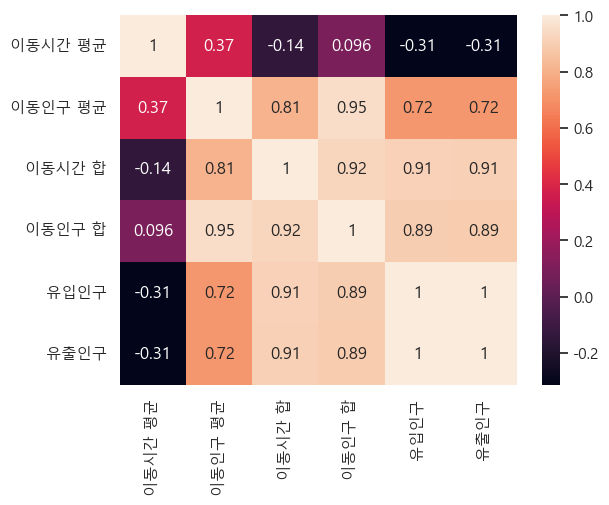

In [46]:
# 아래에 코드를 작성하고 결과를 확인합니다.
sns.heatmap(df_seoul_moving.corr(), annot=True)
plt.show()

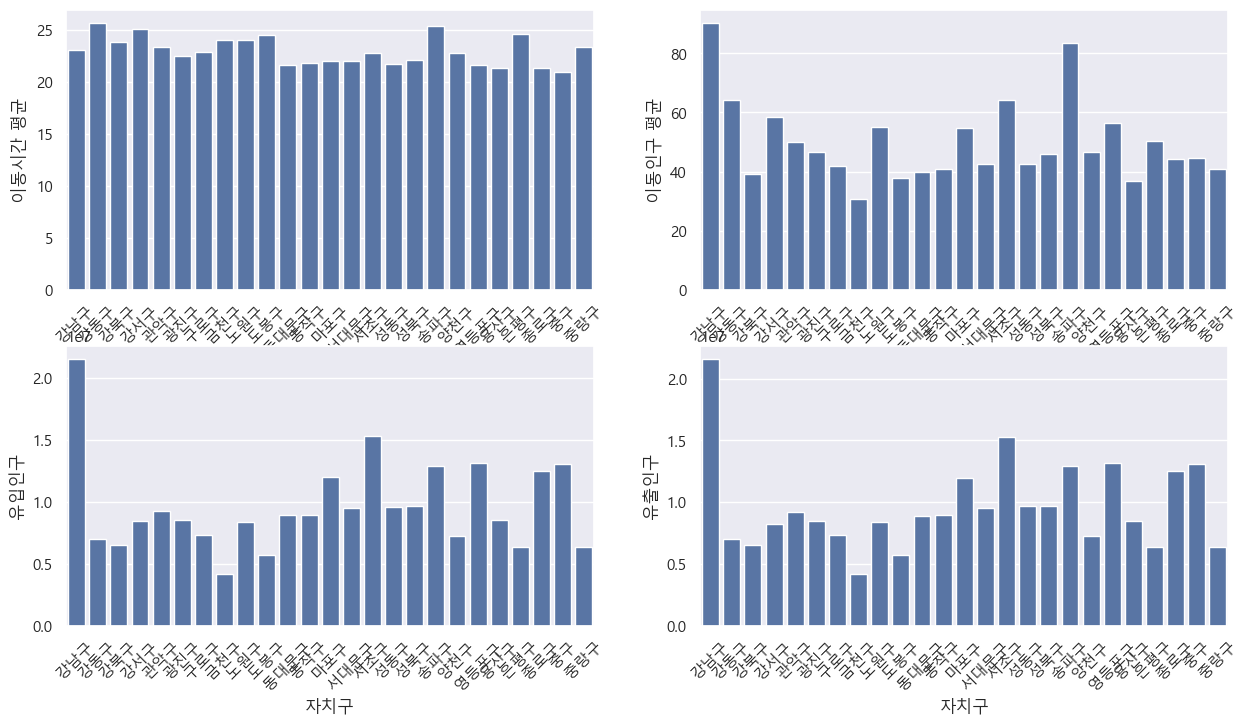

In [47]:
# 아래에 코드를 작성하고 결과를 확인합니다.
plt.figure(figsize=(15,8))

plt.subplot(2,2,1)
sns.barplot(x="자치구", y="이동시간 평균", data=df_seoul_moving)
plt.xticks(rotation=45)

plt.subplot(2,2,2)
sns.barplot(x="자치구", y="이동인구 평균", data=df_seoul_moving)
plt.xticks(rotation=45)

plt.subplot(2,2,3)
sns.barplot(x="자치구", y="유입인구", data=df_seoul_moving)
plt.xticks(rotation=45)

plt.subplot(2,2,4)
sns.barplot(x="자치구", y="유출인구", data=df_seoul_moving)
plt.xticks(rotation=45)

plt.show()

In [48]:
# 위 차트를 통해 알게된 사실을 정리해봅시다.
# 1. 유입인구와 유출인구는 상관이 크다.
# 2. 이동시간 평균의 이동인구에 대한 상관이 약하다.
# 3. 유입, 유출인구는 강남구가 제일 높다.

---